# TODO:
- sample all 26 images get 26 32*1 vector
- get transfer function from one to another

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os

**diode distribution resize to 350**

In [3]:
photodetector_locations = np.array([
    (0, 15),
    (1.756, 8.827),
    (3.512, 17.654),
    (5.74, 13.858),
    (7.483, 5),
    (10.607, 10.607),
    (14.966, 10),
    (13.858, 5.74),
    (15, 0),
    (8.827, -1.756),
    (17.654, -3.512),
    (13.858, -5.740),
    (5, -7.483),
    (10.607, -10.607),
    (10, -14.966),
    (5.74, -13.858),
    (0, -15),
    (-1.756, -8.827),
    (-3.512, -17.654),
    (-5.74, -13.858),
    (-7.483, -5),
    (-10.607, -10.607),
    (-14.966, -10),
    (-13.858, -5.74),
    (-15, 0),
    (-8.827, 1.756),
    (-17.654, 3.512),
    (-13.858, 5.740),
    (-5, 7.483),
    (-10.607, 10.607),
    (-10, 14.966),
    (-5.74, 13.858)
])
detector_offset = np.array([0,0])
centered_offset =  np.array([250,245]) ## assume the center of the ring is at 250
photodetector_loc_new = (((photodetector_locations))/(photodetector_locations.max()) *160).round() + centered_offset +detector_offset

## x offset 
-  from x_center to x_(-8)

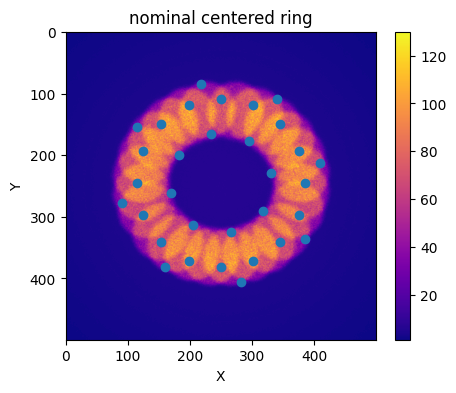

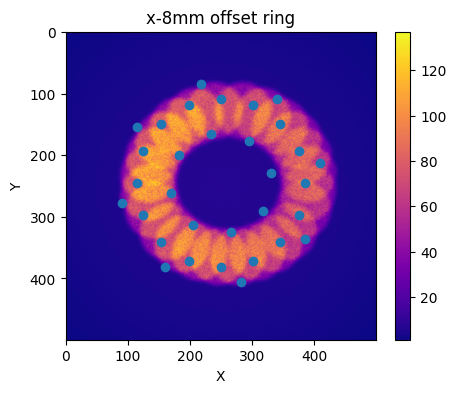

In [109]:
# load the raw data
nominal = np.loadtxt("nominal.csv", delimiter=",")
x_8mm = np.loadtxt("sim_data/xoffset/0.csv", delimiter=",")
# plot the raw image -nominal
plt.figure(figsize=(5, 4))
plt.imshow(nominal, aspect='auto', cmap='plasma')  
plt.colorbar()  
plt.title("nominal centered ring")
plt.xlabel("X")
plt.ylabel("Y")
# plot the scattered diodes on top
plt.scatter(photodetector_loc_new[:,0],photodetector_loc_new[:,1])
# plot the raw image -x offset
plt.figure(figsize=(5, 4))
plt.imshow(x_8mm, aspect='auto', cmap='plasma')  
plt.colorbar()  
plt.title("x-8mm offset ring")
plt.xlabel("X")
plt.ylabel("Y")
# plot the scattered diodes on top
plt.scatter(photodetector_loc_new[:,0],photodetector_loc_new[:,1])



In [2]:
350-170


180

In [110]:
# sample the reading with scattered diodes
diod_center = []
diod_x_8mm = []
for diod in photodetector_loc_new:
    diod_center.append(nominal[int(diod[0]),int(diod[1])])
    diod_x_8mm.append(x_8mm[int(diod[0]),int(diod[1])]) 
# convert to np array for calc Trnasfer matrix
diod_x_8mm = np.array(diod_x_8mm)
diod_center = np.array(diod_center)
# transfer matrix center to x-8
T_x_8 = np.diag((diod_x_8mm / diod_center))
# validate if it's the right transfer matrix
diod_x_8mm_estimated = T_x_8 @ diod_center
print("Original \n", diod_x_8mm)
print("Estimated \n", diod_x_8mm_estimated)

Original 
 [92.    6.06 54.   70.3  30.2  79.4  45.1  67.2  91.5  94.2   4.49 67.6
 73.8  73.3   4.4  70.2  71.8  92.7   6.5  93.4  72.6  85.3  16.4  86.2
 87.5  17.5  42.6  68.7   6.04 98.5  87.6  87.7 ]
Estimated 
 [92.    6.06 54.   70.3  30.2  79.4  45.1  67.2  91.5  94.2   4.49 67.6
 73.8  73.3   4.4  70.2  71.8  92.7   6.5  93.4  72.6  85.3  16.4  86.2
 87.5  17.5  42.6  68.7   6.04 98.5  87.6  87.7 ]


now do the same thing on y_8mm then combine see if it make sense

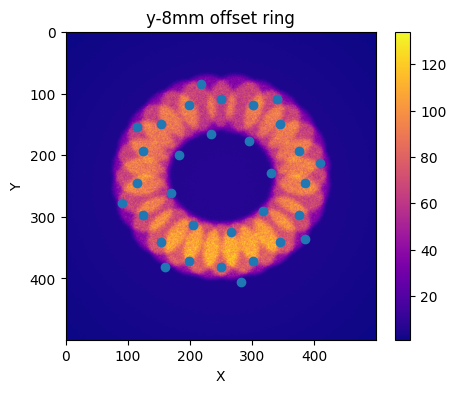

In [111]:
y_8mm = np.loadtxt("sim_data/yoffset/6.csv", delimiter=",")
# plot the raw image -x offset
plt.figure(figsize=(5, 4))
plt.imshow(y_8mm, aspect='auto', cmap='plasma')  
plt.colorbar()  
plt.title("y-8mm offset ring")
plt.xlabel("X")
plt.ylabel("Y")
# plot the scattered diodes on top
plt.scatter(photodetector_loc_new[:,0],photodetector_loc_new[:,1])

In [112]:
# sample the reading with scattered diodes
diod_y_8mm = []
for diod in photodetector_loc_new:    
    diod_y_8mm.append(y_8mm[int(diod[0]),int(diod[1])]) 
# convert to np array for calc Trnasfer matrix
diod_y_8mm = np.array(diod_y_8mm)
# transfer matrix center to y-8
T_y_8 = np.diag((diod_y_8mm / diod_center))
# validate if it's the right transfer matrix
diod_y_8mm_estimated = T_y_8 @ diod_center
print("Original \n", diod_y_8mm)
print("Estimated \n", diod_y_8mm_estimated)

Original 
 [ 91.2   13.9   59.6   71.5  100.    89.5    4.59  79.2   83.3   90.3
   4.57  66.2   70.9   79.8    4.78  63.    91.3   19.4   38.8   87.7
   5.73  85.7   55.9   89.6   65.1    6.1   49.    90.     5.87  78.1
  58.1   89.4 ]
Estimated 
 [ 91.2   13.9   59.6   71.5  100.    89.5    4.59  79.2   83.3   90.3
   4.57  66.2   70.9   79.8    4.78  63.    91.3   19.4   38.8   87.7
   5.73  85.7   55.9   89.6   65.1    6.1   49.    90.     5.87  78.1
  58.1   89.4 ]


put x offset and y offset together

In [113]:
x8mm = np.loadtxt("sim_data/xoffset/6.csv", delimiter=",")
# sample the reading with scattered diodes
diod_x8mm = []
for diod in photodetector_loc_new:    
    diod_x8mm.append(x8mm[int(diod[0]),int(diod[1])]) 
# convert to np array for calc Trnasfer matrix
diod_x8mm = np.array(diod_x8mm)
# transfer matrix center to y-8
T_x8 = np.diag((diod_x8mm / diod_center))

y8mm = np.loadtxt("sim_data/yoffset/6.csv", delimiter=",")
# sample the reading with scattered diodes
diod_y8mm = []
for diod in photodetector_loc_new:    
    diod_y8mm.append(y8mm[int(diod[0]),int(diod[1])]) 
# convert to np array for calc Trnasfer matrix
diod_y8mm = np.array(diod_y8mm)
# transfer matrix center to y-8
T_y8 = np.diag((diod_y8mm / diod_center))

In [119]:
diod_x8y8_estimated = T_x8 @ T_y8 @ diod_center
diod_x8y8_estimated

array([ 86.22545455, 125.62737127,  24.87319422,  69.09306931,
       156.21621622,  81.53403141,   1.20171845,  63.28733945,
        82.21958495, 108.47096774,   8.4083632 ,  53.87907445,
        26.72384615,  93.61872075,  12.88951724,  54.83937824,
        91.19648526,   4.18594982,  68.08106667,  72.69989507,
         1.98678392, 123.24115044,  78.15352381,  64.30117647,
        65.55909732,  13.33488372,  69.65087282, 105.49792531,
        44.15800604,  64.38650964,  34.97686782,  76.91773585])

**compare this with Xiaoli's simulation later**

In [120]:
xy_8 = np.loadtxt("xy8mm.csv", delimiter=",")
diod_xy_real = []
for diod in photodetector_loc_new:    
    diod_xy_real.append(xy_8[int(diod[0]),int(diod[1])]) 
diod_xy_real = np.array(diod_xy_real)
print(diod_xy_real)


[112.    70.4   15.1   70.8   83.5   80.4    4.51  62.8   79.6   94.6
   4.69  74.    57.8   97.5   38.    59.5   84.4    5.99  77.6   65.4
   5.84  82.7   60.5   82.2   77.9    6.14  64.4   93.1   16.8  107.
  68.3   84.  ]


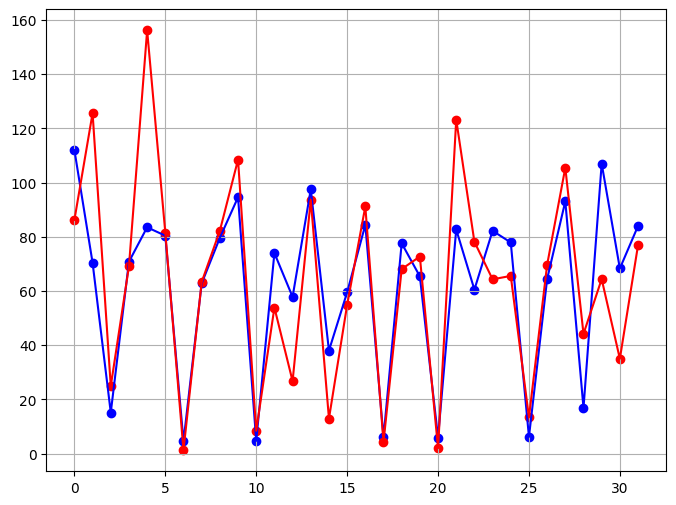

In [121]:
# scatter plot and see how much difference
plt.figure(figsize=(8, 6))
plt.scatter(np.linspace(0,len(diod_xy_real)-1,len(diod_xy_real)),diod_xy_real, color='blue')
plt.plot(np.linspace(0,len(diod_xy_real)-1,len(diod_xy_real)),diod_xy_real, color='blue')
plt.scatter(np.linspace(0,len(diod_x8y8_estimated)-1,len(diod_x8y8_estimated)),diod_x8y8_estimated, color='red')
plt.plot(np.linspace(0,len(diod_x8y8_estimated)-1,len(diod_x8y8_estimated)),diod_x8y8_estimated, color='red')
plt.grid()

In [122]:
## read from profiler image
def DiodReads(prof_image):
    diod_read = []
    for diod in photodetector_loc_new:    
        diod_read.append(prof_image[int(diod[0]),int(diod[1])])
    return np.array(diod_read)


# while stacking, ignore the 2 angle change for now
# label the angle chnages as no off set?

In [123]:

## stack things up by x,y, suncave
def Stackup(nominal,T):
    #nominal*x traansform*y transform * sunflower_angle * suncave angle
    set = []
    for i in range(0,7):
        for j in range(7,14):
            for k in range(14,21):
                for l in range(21,28):        
                    set.append(T[i] @ T[j] @ T[k] @ T[l]@ nominal)
    return set 

In [124]:
# stack up the trainning set
#----- -------- ------- #
# input: 32 diod readings output: offset [x_off, y_off]in mm
root_dir = "D:/Visualise/sim_data"
train_set = []
trans_mats = []
## step by step to do
# get diod readings in each image, get all the transfer function to the nominal image and store in th elist
## combine them in order x,y,suncave,sunflower
# sample the reading with scattered diodes
center_image = np.loadtxt("nominal.csv", delimiter=",")
center_reads = DiodReads(center_image)
for foldername, subfolders, filenames in os.walk(root_dir):    
    for filename in filenames:
        if filename.endswith('.csv'):  # Check if the file is a CSV
            print(filename)
            filepath = os.path.join(foldername, filename)
            image = np.loadtxt(filepath, delimiter=",")
            diod_read = DiodReads(image)
            T = np.diag((diod_read / center_reads))
            trans_mats.append(T)
train_set = Stackup(center_reads,trans_mats)

0.csv
1.csv
2.csv
3.csv
4.csv
5.csv
6.csv
0.csv
1.csv
2.csv
3.csv
4.csv
5.csv
6.csv
0.csv
1.csv
2.csv
3.csv
4.csv
5.csv
6.csv
0.csv
1.csv
2.csv
3.csv
4.csv
5.csv
6.csv


In [125]:
trans_mats

[array([[0.77818182, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.83062331, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 1.04654896, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.87473233, 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.0658046 ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.95283019]]),
 array([[0.94545455, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.79810298, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.8812199 , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 1.10278373, 0.        ,
         0.        ],
        [0. 

do the combination

In [127]:
len(train_set)

2401

In [133]:
import numpy as np
import os
photodetector_locations = np.array([
    (0, 15),
    (1.756, 8.827),
    (3.512, 17.654),
    (5.74, 13.858),
    (7.483, 5),
    (10.607, 10.607),
    (14.966, 10),
    (13.858, 5.74),
    (15, 0),
    (8.827, -1.756),
    (17.654, -3.512),
    (13.858, -5.740),
    (5, -7.483),
    (10.607, -10.607),
    (10, -14.966),
    (5.74, -13.858),
    (0, -15),
    (-1.756, -8.827),
    (-3.512, -17.654),
    (-5.74, -13.858),
    (-7.483, -5),
    (-10.607, -10.607),
    (-14.966, -10),
    (-13.858, -5.74),
    (-15, 0),
    (-8.827, 1.756),
    (-17.654, 3.512),
    (-13.858, 5.740),
    (-5, 7.483),
    (-10.607, 10.607),
    (-10, 14.966),
    (-5.74, 13.858)
])
detector_offset = np.array([0,0])
centered_offset =  np.array([250,245]) ## assume the center of the ring is at 250
photodetector_loc_new = (((photodetector_locations))/(photodetector_locations.max()) *160).round() + centered_offset +detector_offset

## read from profiler image
def DiodReads(prof_image):
    diod_read = []
    for diod in photodetector_loc_new:    
        diod_read.append(prof_image[int(diod[0]),int(diod[1])])
    return np.array(diod_read)

## stack things up by x,y, suncave
def Stackup(nominal,T):
    #nominal*x traansform*y transform * sunflower_angle * suncave angle
    in_set = []
    tar_set = []
    num = 0
    size = 2000
    is_test = True
    for i in range(0,7):
        for j in range(7,14):
            for k in range(14,21):                
                if k == 17:
                    x_off = -1
                elif k>17:
                    x_off = -2
                else:
                    x_off = 0
                for l in range(21,28):                    
                    if l==24:
                        y_off = -1
                    elif l>24:
                        y_off = -2
                    else:
                        y_off = 0
                    if num>=size:
                        if is_test:
                            in_set.clear()
                            tar_set.clear()
                            continue
                        else:
                            break
                    in_set.append(T[i] @ T[j] @ T[k] @ T[l]@ nominal)
                    tar_set.append([(k-14)*3-8+x_off,(l-21)*3-8+y_off])
                    num +=1
    return in_set,tar_set 
# stack up the trainning set
#----- -------- ------- #
# input: 32 diod readings output: offset [x_off, y_off]in mm
root_dir = "D:/Visualise/sim_data"
train_set = []
tar_set = []
trans_mats = []
## step by step to do
# get diod readings in each image, get all the transfer function to the nominal image and store in th elist
## combine them in order x,y,suncave,sunflower
# sample the reading with scattered diodes
center_image = np.loadtxt("nominal.csv", delimiter=",")
center_reads = DiodReads(center_image)
for foldername, subfolders, filenames in os.walk(root_dir):    
    for filename in filenames:
        if filename.endswith('.csv'):  # Check if the file is a CSV
            #print(filename)
            filepath = os.path.join(foldername, filename)
            image = np.loadtxt(filepath, delimiter=",")
            diod_read = DiodReads(image)
            T = np.diag((diod_read / center_reads))
            trans_mats.append(T)
train_set,tar_set = Stackup(center_reads,trans_mats)

In [132]:
help(list.clear)

Help on method_descriptor:

clear(self, /) unbound builtins.list method
    Remove all items from list.



In [19]:
len(tar_set)

2401

In [1]:
## read from profiler image
def DiodReads(prof_image,pd_loc):
    diod_read = []
    for diod in pd_loc:    
        diod_read.append(prof_image[int(diod[0]),int(diod[1])])
    return np.array(diod_read)

In [2]:
## stack things up by x,y, suncave
def Stackup(nominal,T,size,is_test):
    #nominal*x traansform*y transform * sunflower_angle * suncave angle
    in_set = []
    tar_set = []
    num = 0
    for i in range(0,7):
        for j in range(7,14):
            for k in range(14,21):                
                if k == 17:
                    x_off = -1
                elif k>17:
                    x_off = -2
                else:
                    x_off = 0
                for l in range(21,28):                    
                    if l==24:
                        y_off = -1
                    elif l>24:
                        y_off = -2
                    else:
                        y_off = 0
                    if num >= size:
                        if is_test:
                            in_set.clear()
                            tar_set.clear()
                            num = 0
                        else:
                            break        
                    in_set.append(T[i] @ T[j] @ T[k] @ T[l]@ nominal)
                    tar_set.append([(k-14)*3-8+x_off,(l-21)*3-8+y_off])
                    num += 1
    return in_set,tar_set 

In [12]:
def getTrainSet(size,is_test,pd_loc):# stack up the trainning set
#----- -------- ------- #
# input: 32 diod readings output: offset [x_off, y_off]in mm
    root_dir = "D:/Visualise/sim_data"
    train_set = []
    tar_set = []
    trans_mats = []
    ## step by step to do
    # get diod readings in each image, get all the transfer function to the nominal image and store in th elist
    ## combine them in order x,y,suncave,sunflower
    # sample the reading with scattered diodes
    center_image = np.loadtxt("nominal.csv", delimiter=",")
    center_reads = DiodReads(center_image,pd_loc)
    for foldername, subfolders, filenames in os.walk(root_dir):
        # if is_test:
        #     if foldername == "sunflower angle":
        #         continue
        for filename in filenames:
            if filename.endswith('.csv'):  # Check if the file is a CSV
                filepath = os.path.join(foldername, filename)
                image = np.loadtxt(filepath, delimiter=",")
                diod_read = DiodReads(image,pd_loc)
                T = np.diag((diod_read / center_reads))
                trans_mats.append(T)
    train_set,tar_set = Stackup(center_reads,trans_mats,size,is_test)
    return train_set,tar_set



In [138]:
test,tar = getTrainSet(2000,True)

In [141]:
len(tar)

401

# **Different diod layouts**

## layout1 = 2 rings: outter22 inner 10

In [3]:
outter_ring = np.array([[100*np.cos(i*(2*np.pi)/22),100*np.sin(i*(2*np.pi)/22)] for i in range(1,23)])


In [4]:
inner_ring = np.array([[55*np.cos(i*(2*np.pi)/10),55*np.sin(i*(2*np.pi)/10)] for i in range(1,11)])
pd_loc_1 = np.concatenate((inner_ring,outter_ring))

In [5]:
inner_ring

array([[ 4.44959347e+01,  3.23281889e+01],
       [ 1.69959347e+01,  5.23081084e+01],
       [-1.69959347e+01,  5.23081084e+01],
       [-4.44959347e+01,  3.23281889e+01],
       [-5.50000000e+01,  6.73555740e-15],
       [-4.44959347e+01, -3.23281889e+01],
       [-1.69959347e+01, -5.23081084e+01],
       [ 1.69959347e+01, -5.23081084e+01],
       [ 4.44959347e+01, -3.23281889e+01],
       [ 5.50000000e+01, -1.34711148e-14]])

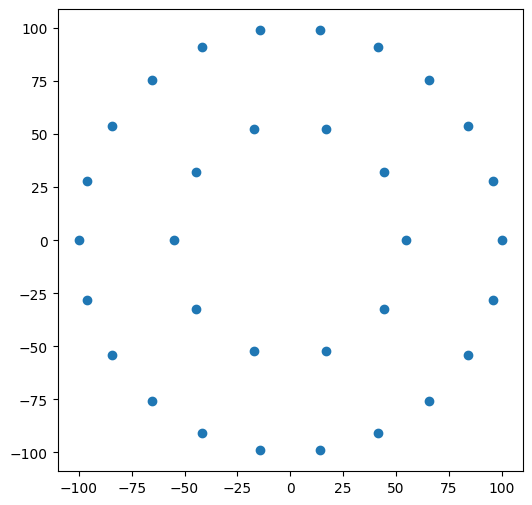

In [8]:
plt.figure(figsize=(6,6))
plt.scatter(pd_loc_1[:,0],pd_loc_1[:,1])

In [17]:
t_1,tar = getTrainSet(2000,False,pd_loc_1)

In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
120*np.cos(3.1/np.sqrt(1.8*1.8+3.1*3.1)),120*np.sin(1.8/np.sqrt(1.8*1.8+3.1*3.1))

(np.float64(77.85608795693537), np.float64(57.7558244165756))

# 4 diod lay out 


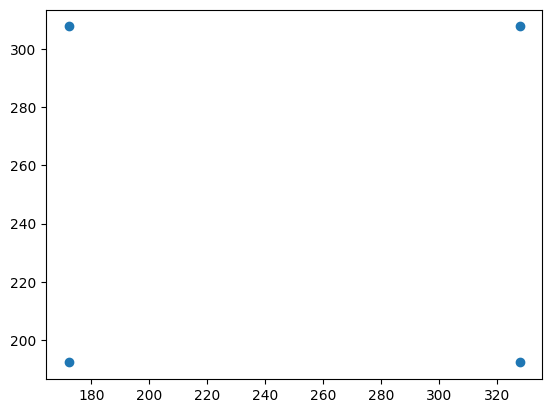

In [18]:
pd_loc_2 = np.array([[77.85,57.75],[-77.85,57.75],[-77.85,-57.75],[77.85,-57.75]])+[250,250]
plt.scatter(pd_loc_2[:,0],pd_loc_2[:,1])

In [ ]:
nominal = np.loadtxt("nominal.csv", delimiter=",")
diod4_data = []
for diod in pd_loc_2:
    diod4_data.append(nominal[int(diod[0]),int(diod[1])])
    

In [21]:
diod4_data

[np.float64(94.8), np.float64(74.6), np.float64(82.1), np.float64(89.7)]

In [51]:
center_x, center_y, radius = 0,0,9
points = []
for x in range(center_x - radius, center_x + radius + 1):  # Bounding box for x
    for y in range(center_y - radius, center_y + radius + 1):  # Bounding box for y
        # Check if the point (x, y) lies inside the circle
        if (x - center_x) ** 2 + (y - center_y) ** 2 <= radius ** 2:
            points.append([x, y])
points = np.array(points)

In [52]:
points

array([[-9,  0],
       [-8, -4],
       [-8, -3],
       [-8, -2],
       [-8, -1],
       [-8,  0],
       [-8,  1],
       [-8,  2],
       [-8,  3],
       [-8,  4],
       [-7, -5],
       [-7, -4],
       [-7, -3],
       [-7, -2],
       [-7, -1],
       [-7,  0],
       [-7,  1],
       [-7,  2],
       [-7,  3],
       [-7,  4],
       [-7,  5],
       [-6, -6],
       [-6, -5],
       [-6, -4],
       [-6, -3],
       [-6, -2],
       [-6, -1],
       [-6,  0],
       [-6,  1],
       [-6,  2],
       [-6,  3],
       [-6,  4],
       [-6,  5],
       [-6,  6],
       [-5, -7],
       [-5, -6],
       [-5, -5],
       [-5, -4],
       [-5, -3],
       [-5, -2],
       [-5, -1],
       [-5,  0],
       [-5,  1],
       [-5,  2],
       [-5,  3],
       [-5,  4],
       [-5,  5],
       [-5,  6],
       [-5,  7],
       [-4, -8],
       [-4, -7],
       [-4, -6],
       [-4, -5],
       [-4, -4],
       [-4, -3],
       [-4, -2],
       [-4, -1],
       [-4,  0],
       [-4,  1

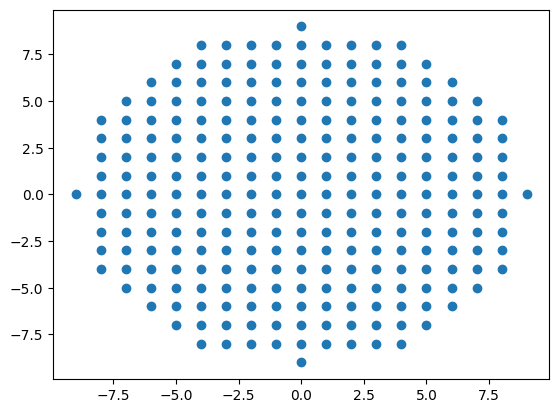

In [53]:
plt.scatter(points[:,0],points[:,1])

In [ ]:
nominal = np.loadtxt("nominal.csv", delimiter=",")
lense_radius = 10
dataWithLense = []
points = []
for diod in pd_loc_2:
    center_x, center_y, radius = int(diod[0]),int(diod[1]),lense_radius
    for x in range(center_x - radius, center_x + radius + 1):  # Bounding box for x
        for y in range(center_y - radius, center_y + radius + 1):  # Bounding box for y
            # Check if the point (x, y) lies inside the circle
            if (x - center_x) ** 2 + (y - center_y) ** 2 <= radius ** 2:
                points.append([x, y])
                dataWithLense.append(nominal[x,y])

        
points = np.array(points)
dataWithLense = np.array(dataWithLense)

In [78]:
len(dataWithLense)

1268

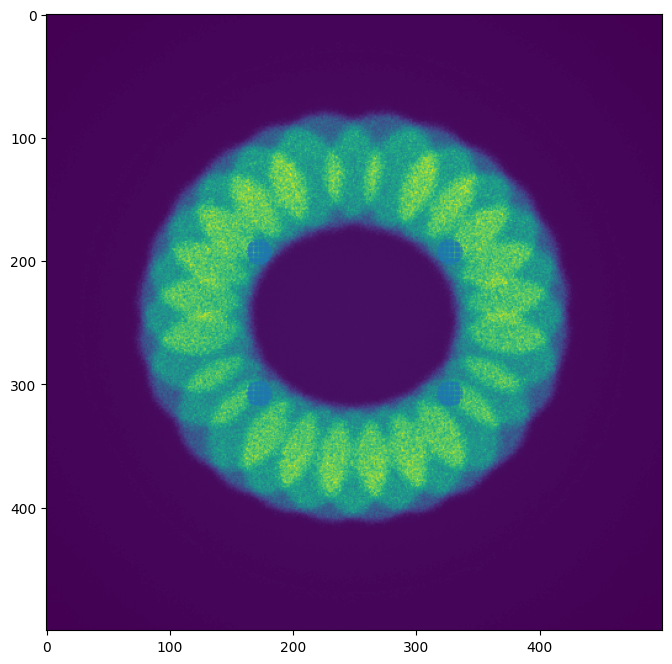

In [85]:
plt.figure(figsize=(10,8))
plt.imshow(nominal)
plt.scatter(points[:,0],points[:,1],s=0.1)

hexagon array lenses 

In [111]:
points_hex = []
radius = 1
vertices = []
for i in range(1,6):  
    x = 0 + radius * np.cos(i*3/np.pi)
    y = 0 + radius  * np.sin(i*3/np.pi)
    vertices.append([x, y])
vertices = np.array(vertices)

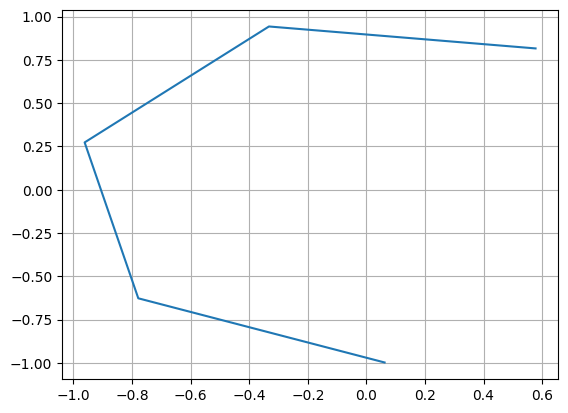

In [112]:

plt.plot(vertices[:,0],vertices[:,1])
plt.grid()

In [110]:
vertices

array([[ 1.        ,  0.        ],
       [ 0.57766618,  0.81627311],
       [-0.33260358,  0.94306673],
       [-0.96193385,  0.2732824 ],
       [-0.77874972, -0.62733473],
       [ 0.0622191 , -0.99806251]])

# compare the moving the retro ring 

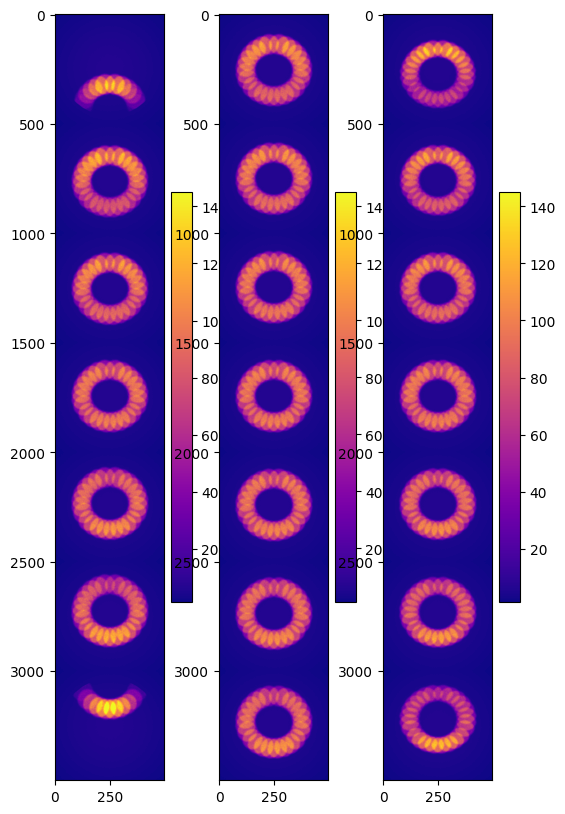

In [55]:
angle_path = "sim_data\\sunflower angle"
plt.figure(figsize=(6,15))
sunflower = np.concatenate([
    np.loadtxt(os.path.join(angle_path,file),delimiter=',')for file in os.listdir(angle_path)
    ])
plt.subplot(1,3,1)
plt.imshow(sunflower,cmap='plasma',vmax=145)
plt.colorbar()
file_path = "sim_data\\yoffset"
# sunflower = np.loadtxt("nominal.csv",delimiter=',')
# for file in os.listdir(file_path):
yoff = np.concatenate([
    np.loadtxt(os.path.join(file_path,file),delimiter=',')for file in os.listdir(file_path)
    ])
plt.subplot(1,3,2)
plt.imshow(yoff,cmap='plasma',vmax=145)
plt.colorbar()
file_path = "sim_data\\suncacve angle"
# sunflower = np.loadtxt("nominal.csv",delimiter=',')
# for file in os.listdir(file_path):
yoff = np.concatenate([
    np.loadtxt(os.path.join(file_path,file),delimiter=',')for file in os.listdir(file_path)
    ])
plt.subplot(1,3,3)
plt.imshow(yoff,cmap='plasma',vmax=145)
plt.colorbar()